<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [48]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



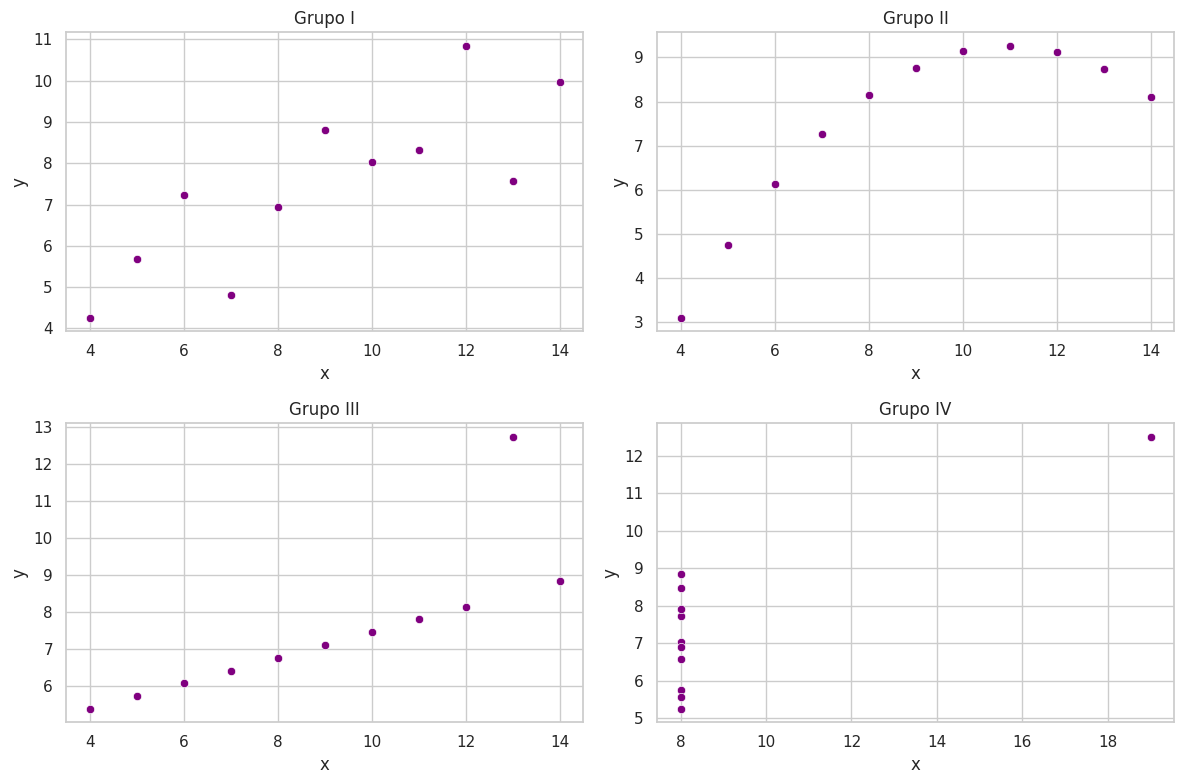

In [49]:
plt.figure(figsize=(12, 8))

grupos = data['dataset'].unique()

for i, grupo in enumerate(grupos, 1):
    plt.subplot(2, 2, i)  # 2 filas, 2 columnas, posición i
    sns.scatterplot(
        x="x",
        y="y",
        data=data[data["dataset"] == grupo],
        color="purple"
    )
    plt.title(f"Grupo {grupo}")
    plt.xlabel("x")
    plt.ylabel("y")

plt.tight_layout()
plt.show()

En el __Grupo I__ se puede ver que es bastante disperso pero con una tendencia lineal, el __Grupo II__ se puede ver que se genera una curva por lo que no es una relación lineal, en __Grupo III__ se ve una progresión lineal con 1 punto aislado y finalmente en el __Grupo IV__ se ve una línea con un punto aislado

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [ ]:
data2 = data.groupby('dataset')
data2['x'].describe()

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
I,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
II,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
III,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
IV,11.0,9.0,3.316625,8.0,8.0,8.0,8.0,19.0


In [ ]:
data2['y'].describe()

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
I,11.0,7.500909,2.031568,4.26,6.315,7.58,8.57,10.84
II,11.0,7.500909,2.031657,3.10,6.695,8.14,8.95,9.26
III,11.0,7.500000,2.030424,5.39,6.250,7.11,7.98,12.74
IV,11.0,7.500909,2.030579,5.25,6.170,7.04,8.19,12.50


Notemos que, para los 4 grupos las estadísticas principales son muy similares, teniendo el promedio y la desvación estándar con diferencias mínimas entre los grupos.

Pero, cuando se observan los otros datos, podemos ver cambios significativos, así que analicemos esto por grupo:

__Grupo I:__ En `x` se mantiene igual a la mayoría de grupos, en `y` parece mantenerse siempre en un intermedio teniendo el segundo mayor cuartil (en los 3 entregados por la estadística) pero manteniendo su `mínimo` y `máximo` como el segundo menor.

__Grupo II:__ En `x` se mantiene igual a la mayoría de grupos, en `y` tiene el menor `mínimo` y `máximo` pero teniendo el mayor cuartil (en los 3 entregados por la estadística).

__Grupo III:__ En `x` se mantiene igual a la mayoría de grupos,en `y` podemos encontrar los mayores `mínimo` y `máximo` pero manteniéndose entre los menores de los cuartiles.

__Grupo IV:__ En `x` es el único que cambia, teniendo un `mínimo`y `máximo` superiores a los otros grupos y manteniendo sus cuartiles constantes en contraste a los otros grupos que en cada cuartil aumentan, en `y` también podemos encontrar un `mínimo` y `máximo` superiores (aunque no el mayor) pero con los cuartiles `25&` y `50%` en los menores valores de la tabla y en el cuartil `75%` el segundo menor.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



/tmp/ipython-input-3268854435.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipython-input-3268854435.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipython-input-3268854435.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipython-input-3268854435.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


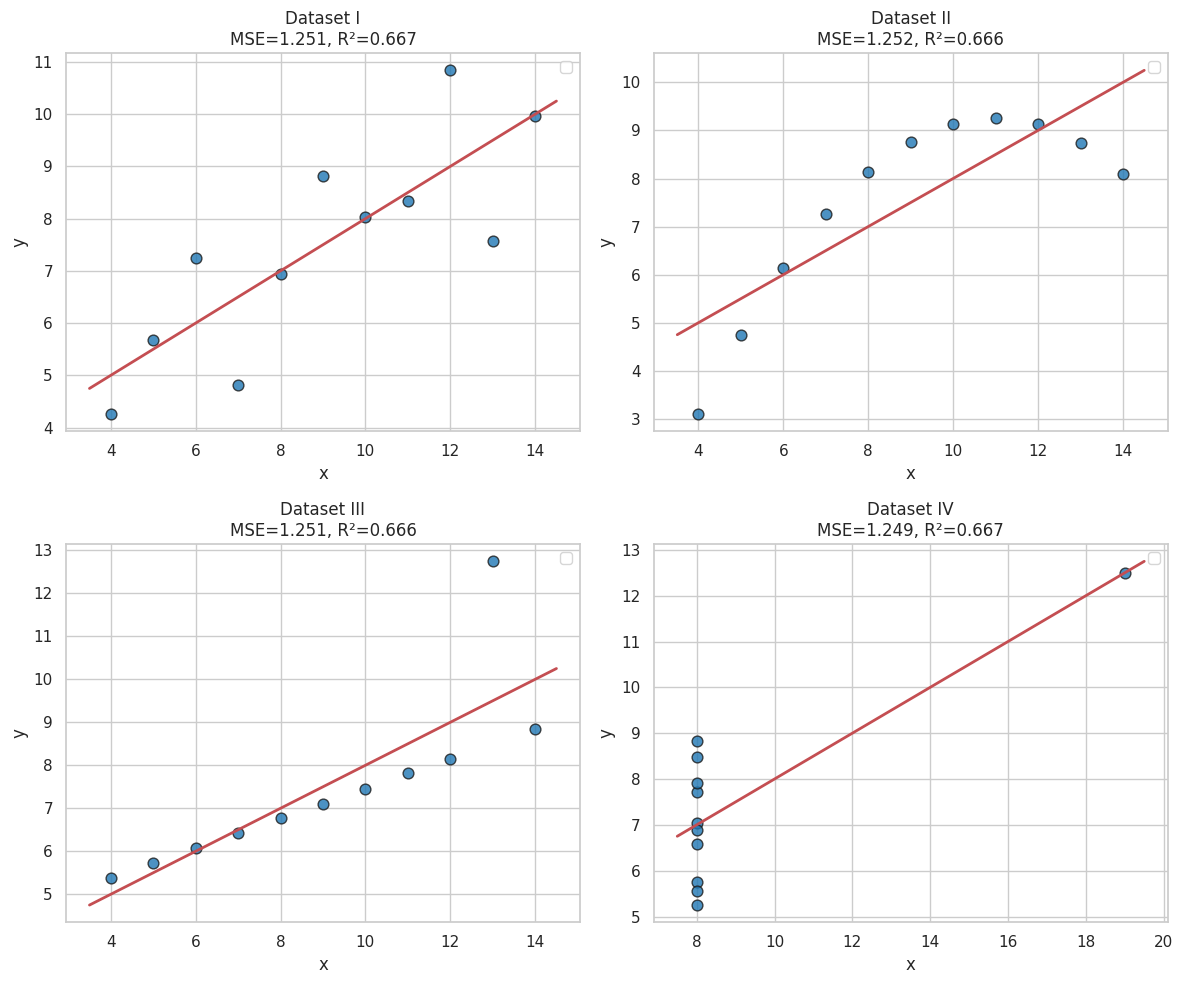


Linear regression results:
I: MSE=1.2512, R²=0.6665
II: MSE=1.2524, R²=0.6662
III: MSE=1.2506, R²=0.6663
IV: MSE=1.2493, R²=0.6667


In [50]:
results = {}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, ds in zip(axes, data['dataset'].unique()):
    sub = data[data['dataset'] == ds]
    X, y = sub['x'].values.reshape(-1, 1), sub['y'].values
    lr = LinearRegression().fit(X, y)
    y_pred = lr.predict(X)
    mse, r2 = mean_squared_error(y, y_pred), r2_score(y, y_pred)
    results[ds] = dict(model="linear", mse=mse, r2=r2)
    ax.scatter(sub['x'], y, color='tab:blue', s=60, alpha=0.8,
               edgecolor='k')
    xs = np.linspace(X.min()-0.5, X.max()+0.5, 200).reshape(-1, 1)
    ax.plot(xs, lr.predict(xs), 'r-', lw=2)
    ax.set_title(f"Dataset {ds}\nMSE={mse:.3f}, R²={r2:.3f}")
    ax.set(xlabel="x", ylabel="y")
    ax.legend()

plt.tight_layout()
plt.show()

print("\nLinear regression results:")
for ds, r in results.items():
    print(f"{ds}: MSE={r['mse']:.4f}, R²={r['r2']:.4f}")

Para los 4 grupos se puede ver un error cuadrático medio (MSE) Y R² casi idénticos, lo que matemáticamente nos suguiere que los 4 grupos tienen el mismo comportamiento estadístico global (como si la relación lineal fuese la misma para todos los grupos), sin embargo sabemos que esto no es así, puesto que el primer grupo tiene una relación lineal clara, la segunda no tiene una relación lineal al formar una curva, el tercero, aunque la mayoría de los puntos siguen de cerca a la recta, tiene un punto aislado que produce que la relación lineal se vaya alejando poco a poco del grupo (dejando el primer punto muy cerca de la relación lineal pero el penúltimo mucho más lejos) y el cuarto grupo son puntos verticales exceptuado por un único punto extremos, que produce que el error cuadrático medio sea similar a los de los otros grupos.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

/tmp/ipython-input-1180656133.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipython-input-1180656133.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipython-input-1180656133.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipython-input-1180656133.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


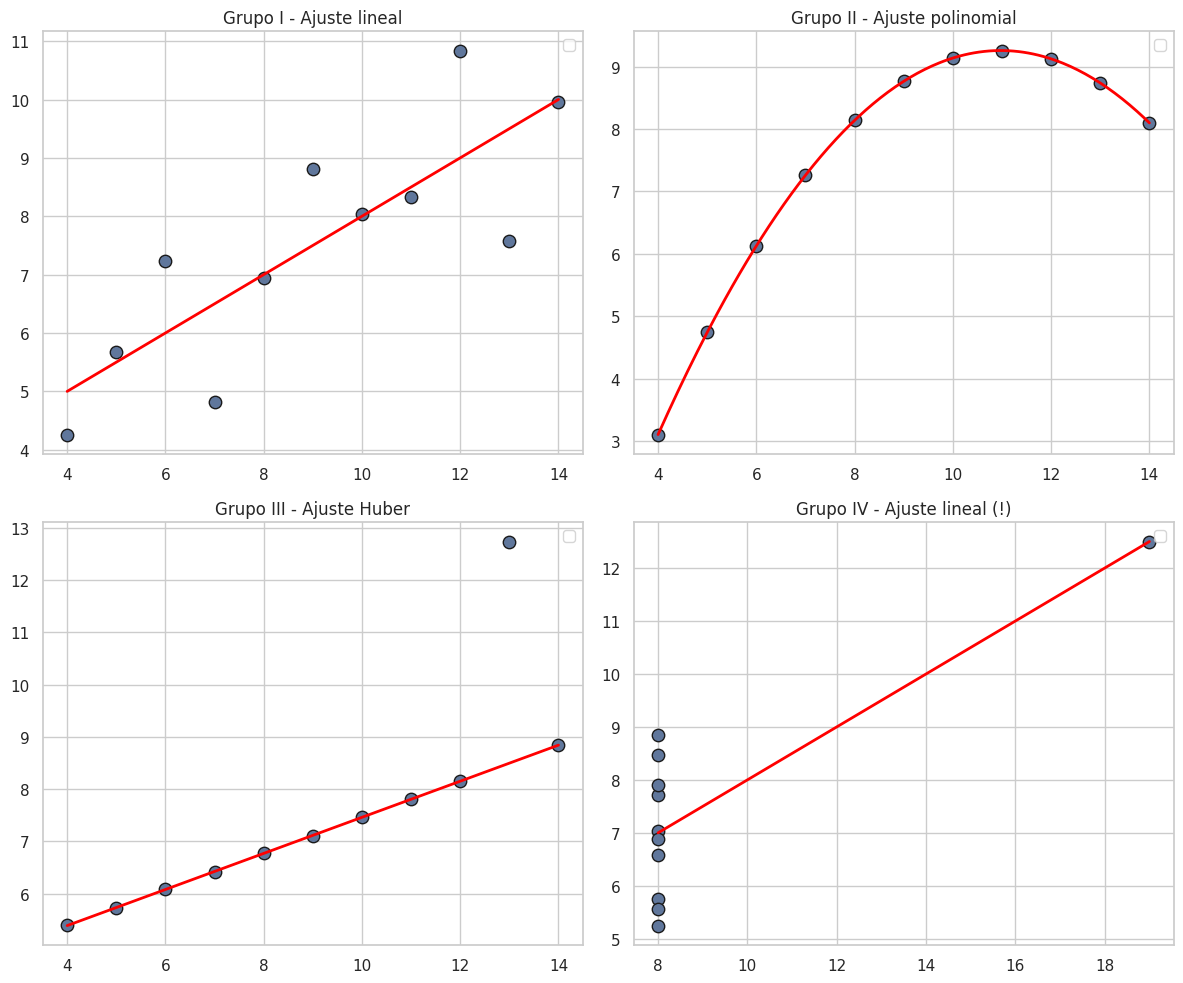

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, ds in zip(axes, sorted(data['dataset'].unique())):
    sub = data[data['dataset'] == ds]
    X = sub[['x']].values
    y = sub['y'].values
    X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1,1)

    if ds == "I":
        model = LinearRegression().fit(X, y)
        y_plot = model.predict(X_plot)
        label = "Ajuste lineal"

    elif ds == "II":
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.pipeline import make_pipeline
        model = make_pipeline(PolynomialFeatures(2), LinearRegression()).fit(X, y)
        y_plot = model.predict(X_plot)
        label = "Ajuste polinomial"

    elif ds == "III":
        from sklearn.linear_model import HuberRegressor
        model = HuberRegressor().fit(X, y)
        y_plot = model.predict(X_plot)
        label = "Ajuste Huber"

    elif ds == "IV":
        model = LinearRegression().fit(X, y)
        y_plot = model.predict(X_plot)
        label = "Ajuste lineal (!)"

    ax.scatter(X, y, edgecolor="k", s=80)
    ax.plot(X_plot, y_plot, color="red", linewidth=2)
    ax.set_title(f"Grupo {ds} - {label}")
    ax.legend()

plt.tight_layout()
plt.show()


Para el __Grupo I__ la relación lineal es acertada, para el __Grupo II__ se puede generar un ajuste no lineal al ser una curva a travéz de una relación polinómica, para el __Grupo III__ podemos jenerar un ajuste Huber y para el __Grupo IV__ no existe un ajuste lineal que represente a este grupo.